<a href="https://colab.research.google.com/github/yeonmi02/deep-learning-practice/blob/main/250507_housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15장 실제 데이터로 만들어 보는 모델

## 1. 데이터 파악하기

In [13]:
# 딥러닝을 구현하기 위한 클래스 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
# 파일 불러오는 코드
!git clone https://github.com/taehojo/data.git
df = pd.read_csv("./data/house_train.csv")
df

fatal: destination path 'data' already exists and is not an empty directory.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


## 2. 결측치, 카테고리 변수 처리하기

In [3]:
# 결측치 처리
df.isnull().sum().sort_values(ascending=False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [12]:
# 카테고리형 변수를 수치형으로 전환
df = pd.get_dummies(df)
# 결측치를 가지고 평균값을 찾아 대체하는 코드
df = df.fillna(df.mean())
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [5]:
# 속성들 중 필요한 속성만 10개를 추출
df_corr=df.corr()
df_corr_sort=df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
BsmtQual_Ex,0.553105
TotRmsAbvGrd,0.533723


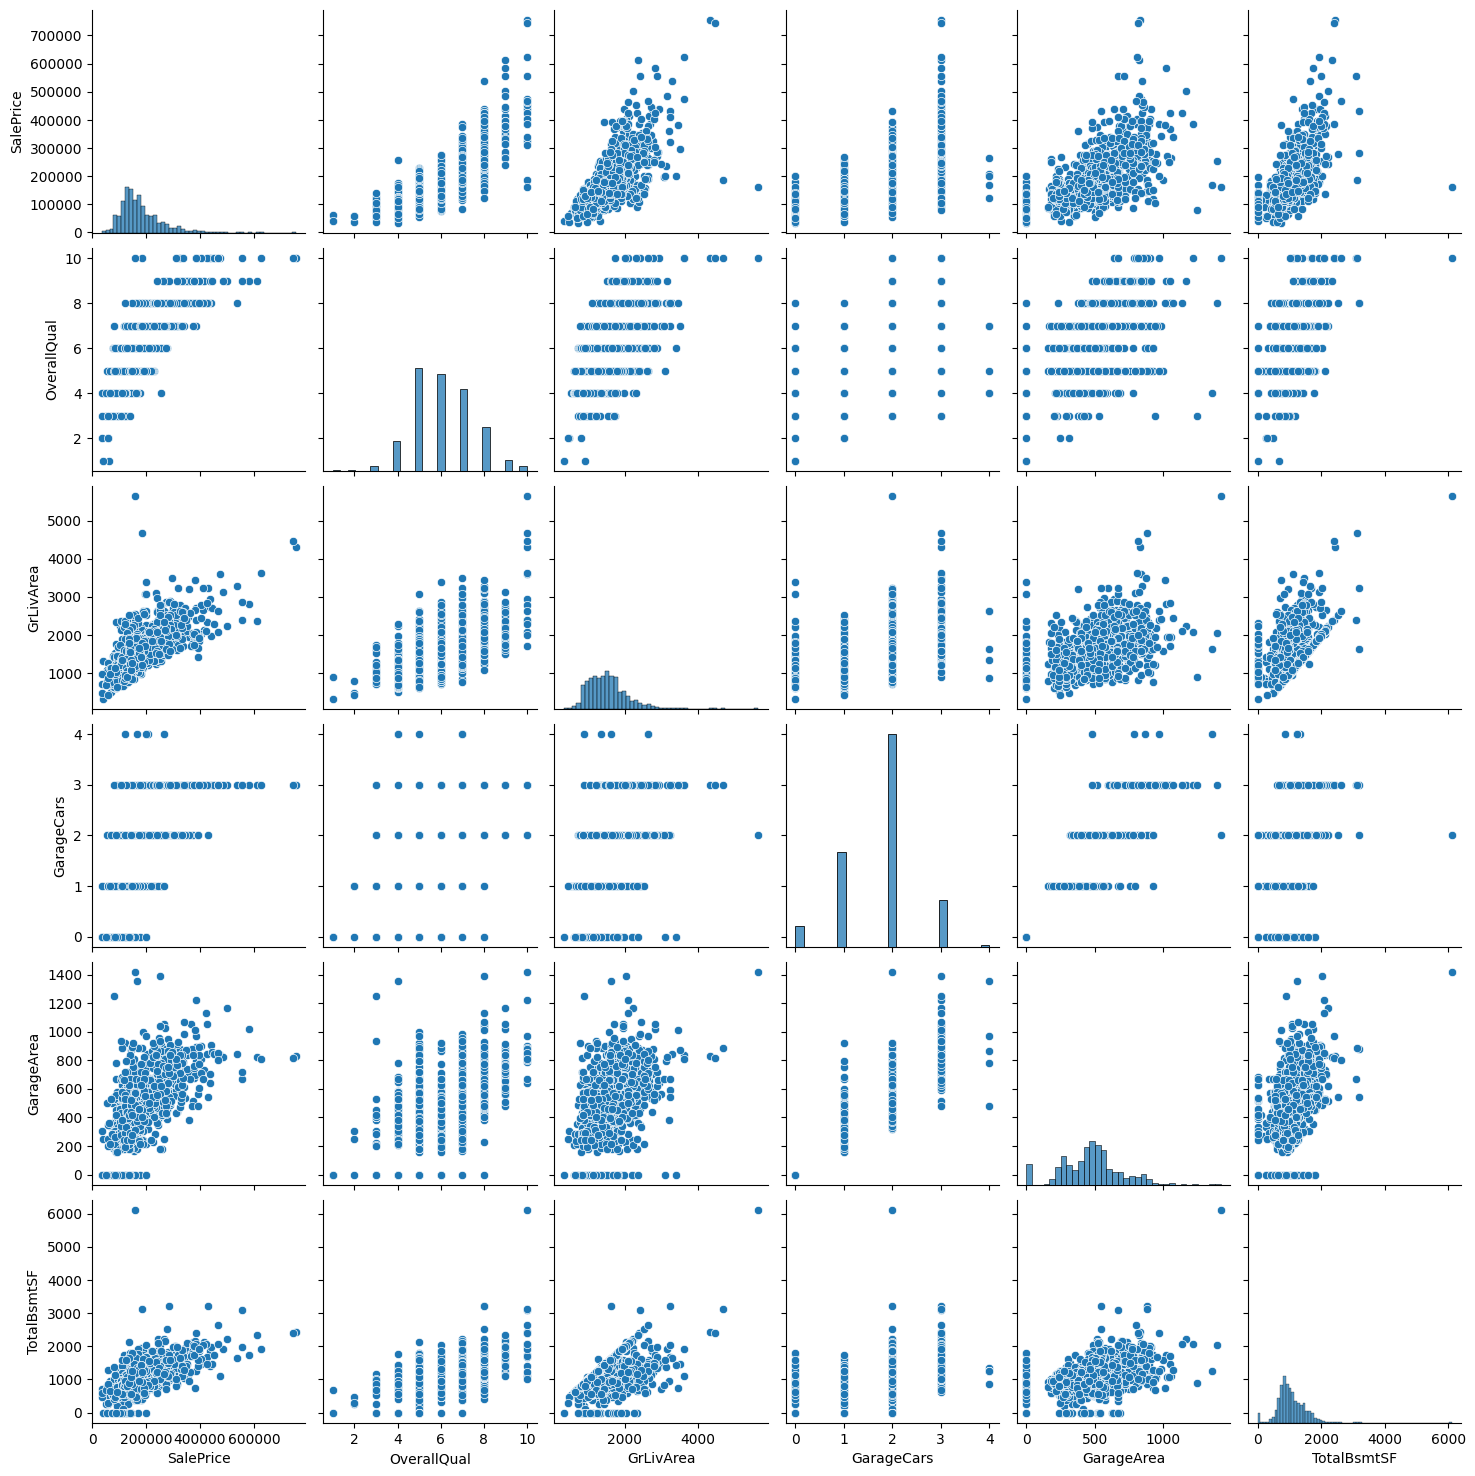

In [6]:
# 그 중 6개에 대해 그래프 확인
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df[cols])
plt.show();

## 4. 주택 가격 예측 모델

In [7]:
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]
y = df['SalePrice'].values

In [8]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [9]:
# 딥러닝 모델 구현
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath="./data/model/Ch15-house.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,671 (6.53 KB)

 Trainable params: 1,671 (6.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 40735264768.0000 - val_loss: 36282867712.0000
Epoch 2/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38463459328.0000 - val_loss: 35876069376.0000
Epoch 3/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38009556992.0000 - val_loss: 34970619904.0000
Epoch 4/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36148744192.0000 - val_loss: 32925992960.0000
Epoch 5/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35319934976.0000 - val_loss: 28759068672.0000
Epoch 6/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29153714176.0000 - val_loss: 21681680384.0000
Epoch 7/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20708253696.0000 - val_loss: 12600840192.0000
Epoch 8/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11431169024.0000 - val_loss: 4947252224.0000
Epoch 9/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4827438592.0000 - val_loss: 2140697088.0000
Epoch 10/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

In [10]:
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제값, 예측값 출력
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
실제가격: 143250.00, 예상가격: 161610.59
실제가격: 185000.00, 예상가격: 194177.20
실제가격: 194500.00, 예상가격: 194201.77
실제가격: 123000.00, 예상가격: 132311.16
실제가격: 119000.00, 예상가격: 216070.86
실제가격: 139900.00, 예상가격: 157013.50
실제가격: 116000.00, 예상가격: 132985.48
실제가격: 177500.00, 예상가격: 171342.66
실제가격: 109000.00, 예상가격: 118804.84
실제가격: 205000.00, 예상가격: 200509.72
실제가격: 207500.00, 예상가격: 201430.03
실제가격: 385000.00, 예상가격: 283946.69
실제가격: 290000.00, 예상가격: 286526.94
실제가격: 135500.00, 예상가격: 149253.12
실제가격: 119000.00, 예상가격: 112355.03
실제가격: 255500.00, 예상가격: 271837.81
실제가격: 171000.00, 예상가격: 280318.16
실제가격: 328900.00, 예상가격: 230108.48
실제가격: 122000.00, 예상가격: 146379.81
실제가격: 143900.00, 예상가격: 186646.81
실제가격: 204750.00, 예상가격: 211480.42
실제가격: 162000.00, 예상가격: 182790.39
실제가격: 119200.00, 예상가격: 137845.28
실제가격: 147000.00, 예상가격: 156807.03
실제가격: 155000.00, 예상가격: 171135.75


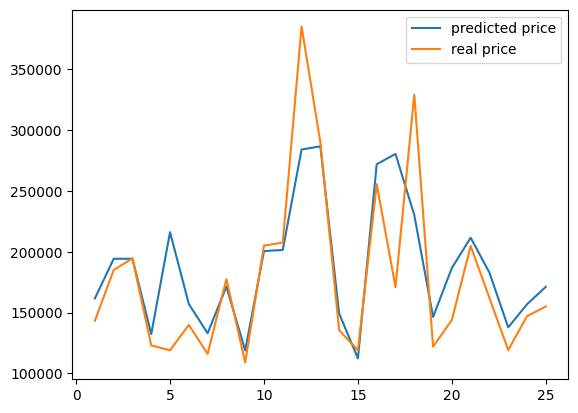

In [11]:
# 그래프를 통해 샘플로 뽑은 25개의 값 비교
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()